In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

In [2]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [3]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [4]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
data[0:3]

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4


In [7]:
X=data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [8]:
y=data['region']
y.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

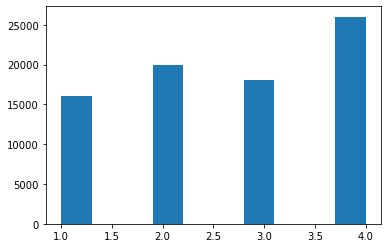

In [9]:
plt.hist(data['region'])
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [11]:
algo=DecisionTreeClassifier(max_depth=3)
model=algo.fit(X_train,y_train)

In [12]:
preds=model.predict(X_test)

In [13]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.41      0.67      0.51      4857
           2       0.90      1.00      0.95      5945
           3       0.56      0.11      0.18      5389
           4       0.65      0.70      0.68      7809

    accuracy                           0.64     24000
   macro avg       0.63      0.62      0.58     24000
weighted avg       0.64      0.64      0.60     24000



In [14]:
print(accuracy_score(y_test,preds))

0.63725


In [15]:
class_names = ['south', 'west','east','north']

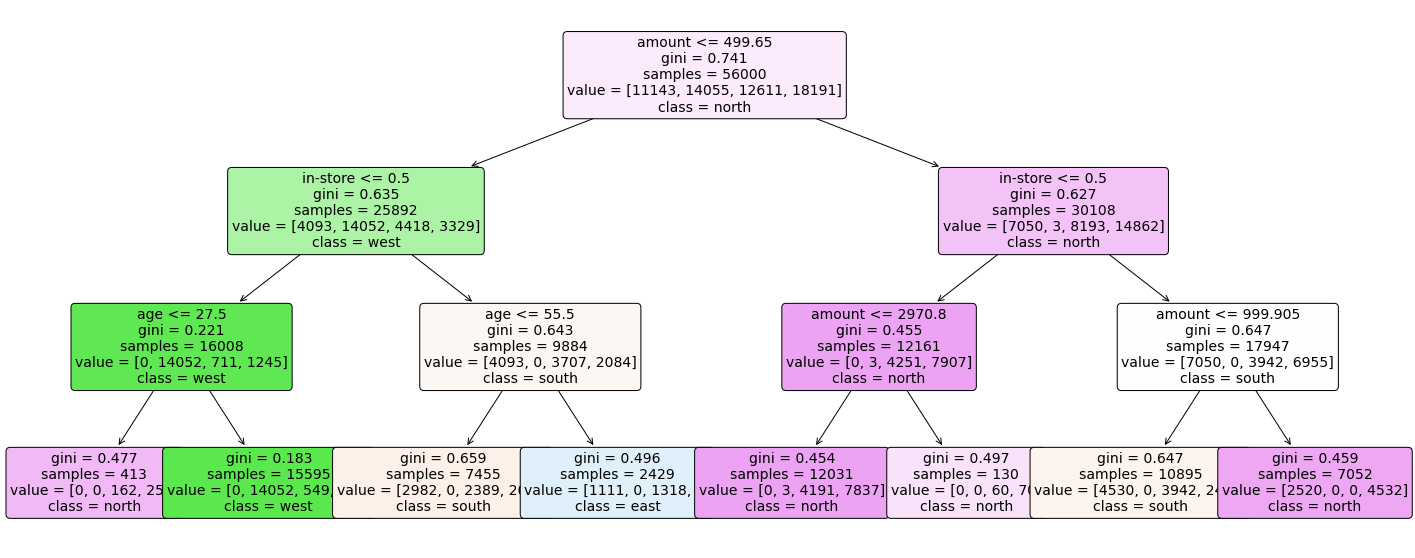

In [16]:
plt.figure(figsize=(25,10))
a=plot_tree(model,
           feature_names=X.columns,
           class_names=class_names,
           filled=True,
           rounded=True,
           fontsize=14)
plt.savefig('my_tree_regioin.png', transparent=True, bbox_inches='tight')
plt.show() 

In [17]:
algo_1 = GradientBoostingClassifier(n_estimators=100)
model_1 = algo_1.fit(X_train, y_train)
print(model_1)

GradientBoostingClassifier()


In [18]:
tree_100 = algo_1.estimators_[99, 0]

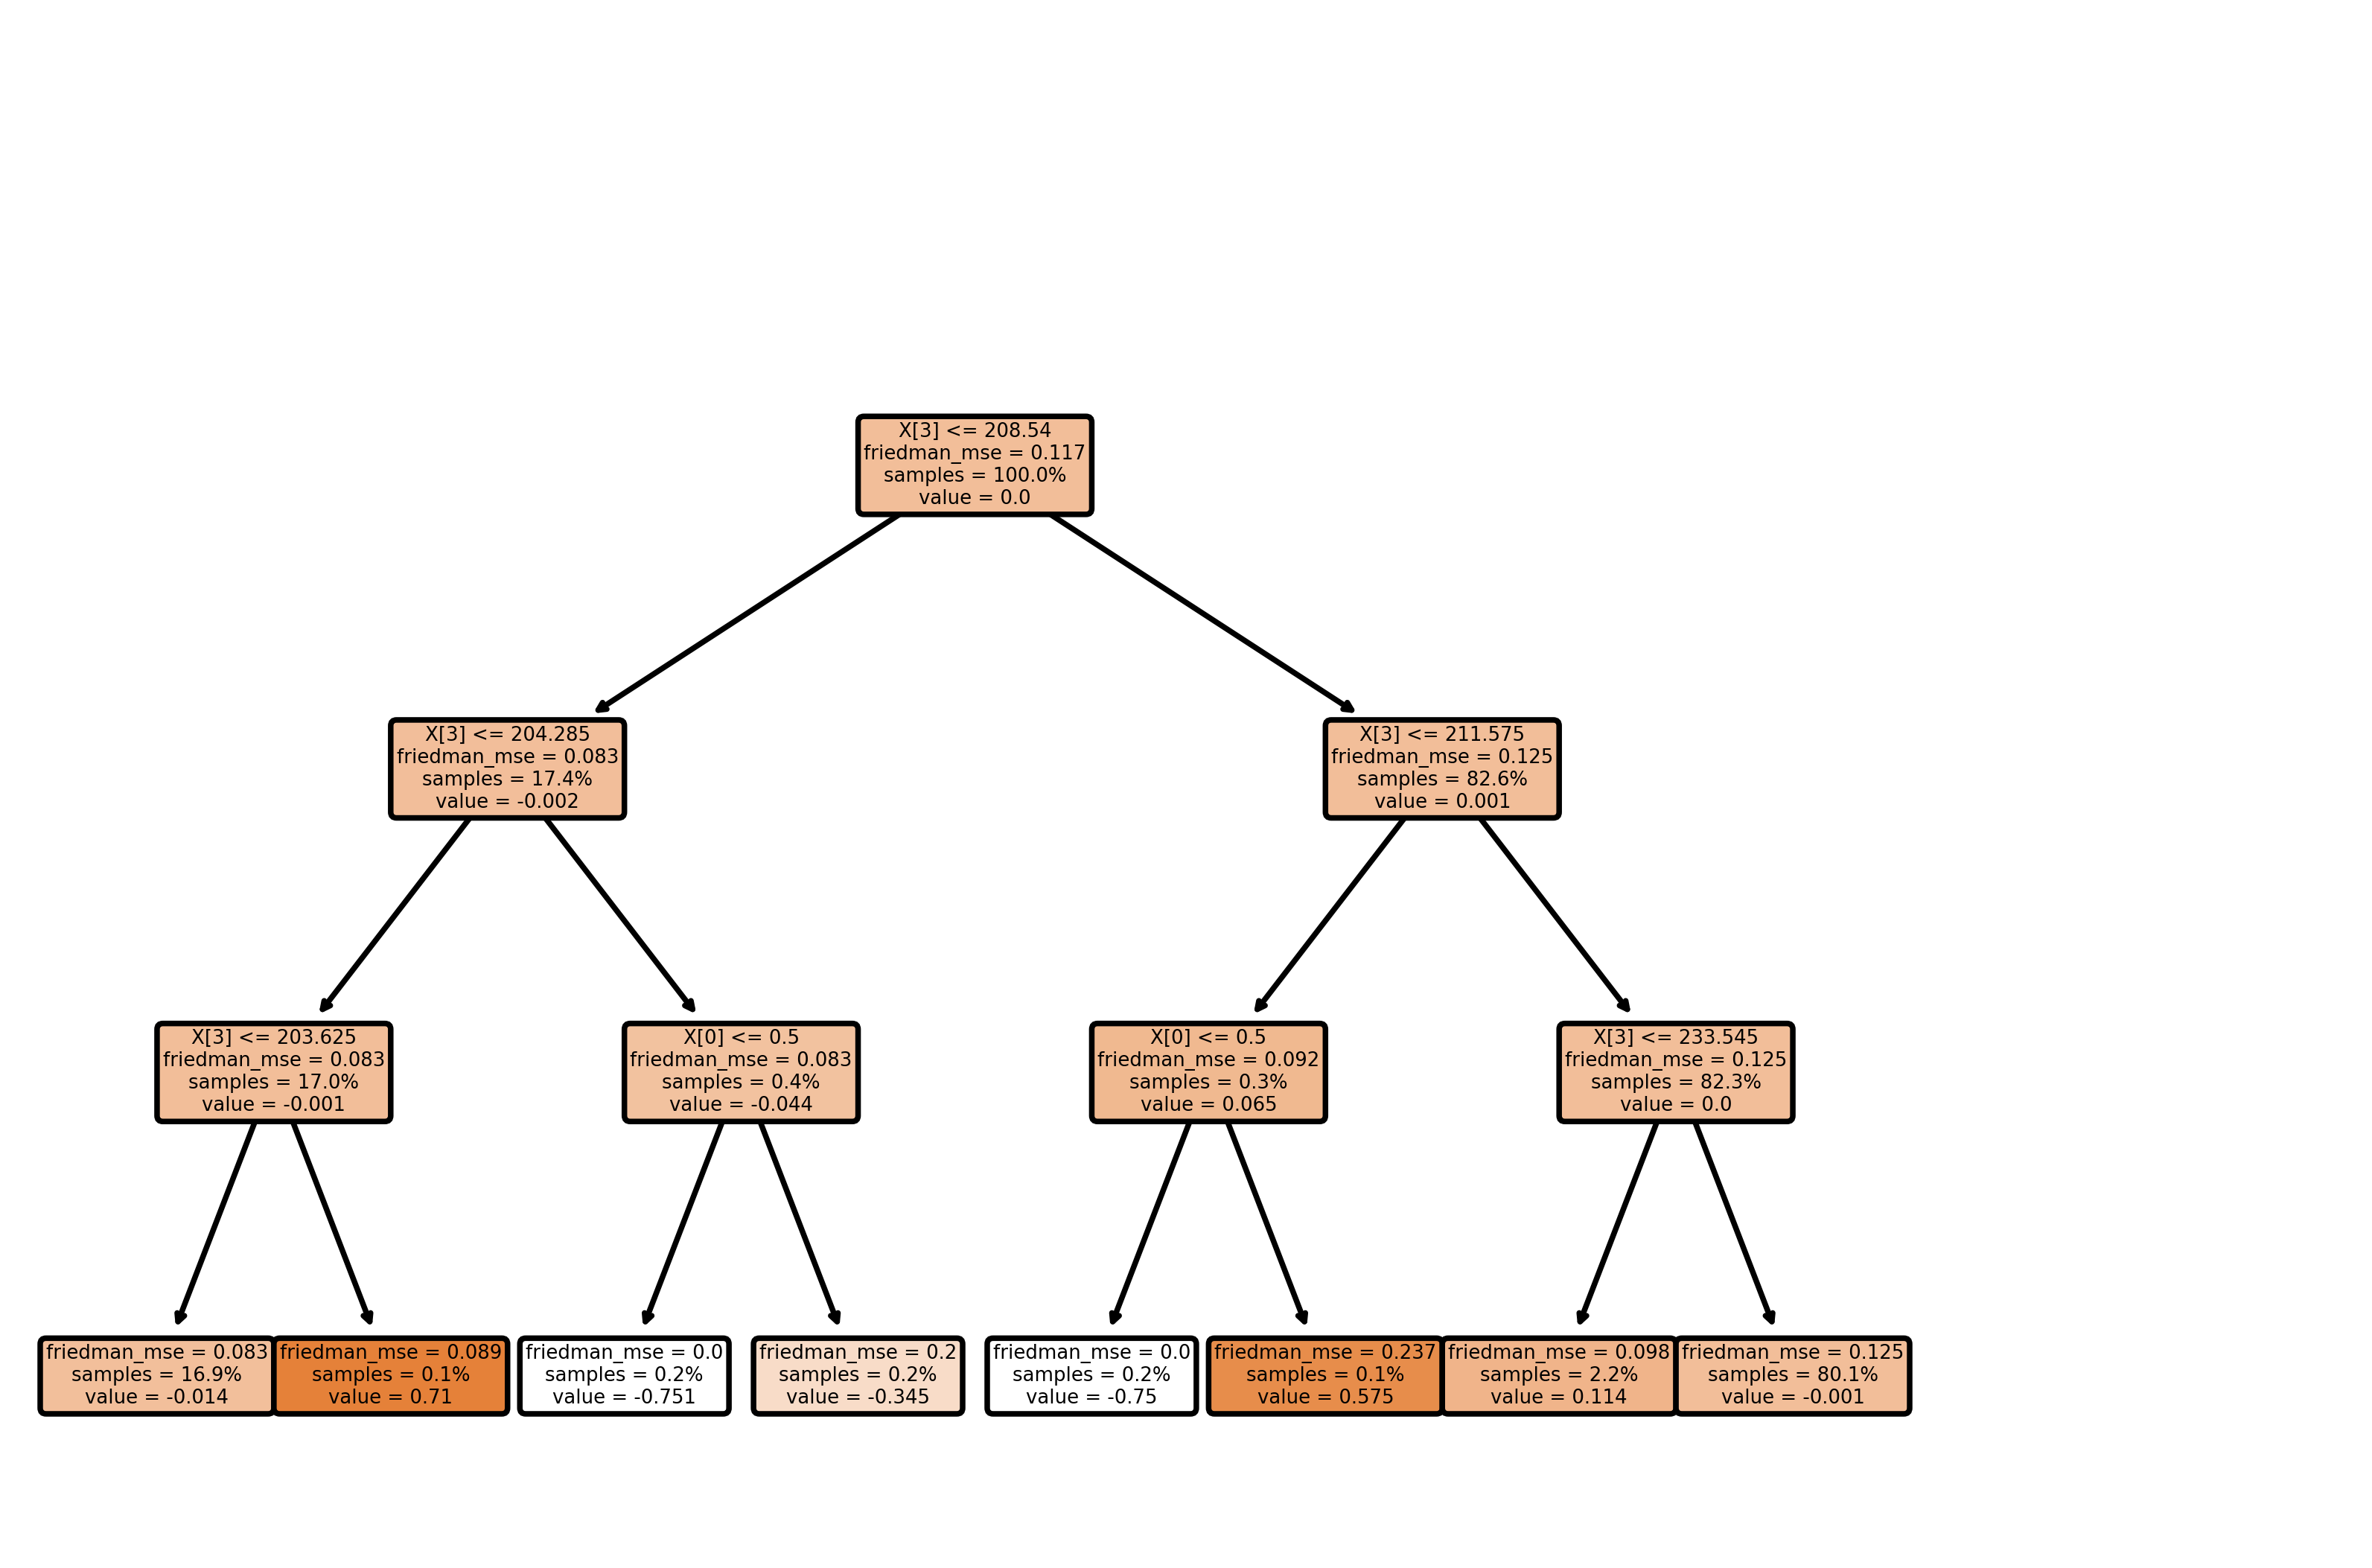

In [19]:
fig = plt.figure(dpi=540)
plot_tree(tree_100,
         filled=True,
         rounded=True,
         proportion=True,)
plt.tight_layout()
plt.savefig("tree_structure_region.png")
plt.show()

In [20]:
# Cross Validation Method
from sklearn.model_selection import cross_val_score


In [21]:
algos_Class=[]
algos_Class.append(('Random Forest Classifier', RandomForestClassifier(max_depth=3)))
algos_Class.append(('Decision Trees Classifier', DecisionTreeClassifier(max_depth=3)))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(max_depth=3)))



In [22]:
results=[]
names=[]
for name, model in algos_Class:
    result=cross_val_score(model, X, y, cv=3,scoring='accuracy')
    names.append(name)
    results.append(result)

In [23]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.6348500192611314
Decision Trees Classifier 0.6358374914485924
Gradient Boosting Classifier 0.6433750209825669


In [24]:
#result=cross_val_score(model,X,y,cv=3,scoring='accuracy')

In [25]:
#print(result.mean())